<a href="https://www.kaggle.com/code/pumpkin18/heart-disease-prediction-and-eda?scriptVersionId=125900526" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<div style="padding:30px;color:white;margin:0;font-size:200%;text-align:center;display:fill;border-radius:5px;background-color:#C85C8E;overflow:hidden;font-weight:800">❤️❤️ Heart Disease Prediction And EDA 📊 📈 </div>





<div id='imports'
     style = "display: fill;
              border-radius: 10px;
              background-color: #6867AC;">
    <h2 style = "padding: 25px; 
                 color: White;
                 text-align: left;
                 font-family: Trebuchet MS;">Table of Contents
    </h2>
</div>
<a id="toc"></a>

- [1. Introduction](#1)
    - [1.1 Importing Libraries](#IL)
    - [1.2 Reading Dataset](#RD)
    - [1.3 Dataset Information](#DI)
        
        
- [2. Exploratory Data Analysis](#2)
    - [2.1 Categorical Data Visualization](#CDV)
    - [2.2 Heart Disease Distribution based on Gender](#HDG)
    - [2.3 Heart Disease Distribution based on Major Vessels Total](#HDV)
    - [2.4 Heart Disease Scatter Plot based on Age](#HDA)
    - [2.5 Heart Disease Distribution based on Fasting Blood Sugar](#HDS)
    - [2.6  Heatmap](#heatmap)
    
    
  
- [3. Data Preprocessing](#3)
    - [3.1 One Hot Encoding](#OHE)
    - [3.2 Featuring Separating](#FS)
    - [3.3 Data Normalization](#DN)
    - [3.4 Splitting the Dataset](#STTD)


- [4. Model Training](#4)
    - [4.1 Logistic Regression](#LR)
    - [4.2  K-Nearest Neighbour (KNN)](#KNN)
    - [4.3 Support Vector Machine (SVM)](#SVM)
    - [4.4 Gaussian Naive Bayes](#NB)
    - [4.5 Decision Tree](#DT)
    - [4.6 Random Forest](#RF)
    - [4.7 Gradient Boosting](#GB)
    - [4.8 AdaBoost](#AB)
    - [4.9 Extra Tree Classifier](#ETC)
    - [4.10 MODEL COMPARISSION](#MC)

- [5. Evaluation](#5)
    - [5.1 Accuracy](#ACC)
    - [5.2 Confusion Matrix](#CM)
    - [5.3 Classification Report](#CR)
    - [5.4 Scores From Confusion Matrix](#SCM)
    - [5.5 ROC CURVE](#ROC)
    - [5.6 ROC AUC Score](#AUC)
    - [5.7 Learning Curve](#LC)
 
- [6. Upvote](#6)

<div id='1'
     style = "display: fill;
              border-radius: 10px;
              background-color: #19A7CE;">
    <h1 style = "padding: 20px; 
                 color: white;
                 text-align: left;
                 font-family: Trebuchet MS;">1.Introduction
    </h1>
</div>

<div id='IL'
     style = "display: fill;
              border-radius: 10px;
              background-color: #FE6244;">
    <h3 style = "padding: 15px; 
                 color: white;
                 text-align: left;
                 font-family: Trebuchet MS;">Importing Libraries
    </h3>
</div>

In [1]:
#Data Handling
import numpy as np 
import pandas as pd 

#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import tree
import graphviz

#Preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

#Modelsl
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,ExtraTreesClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB

#Evalutaion
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score
from yellowbrick.classifier import PrecisionRecallCurve, ROCAUC, ConfusionMatrix
from yellowbrick.style import set_palette
from yellowbrick.model_selection import LearningCurve, FeatureImportances
from yellowbrick.contrib.wrapper import wrap


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



import warnings
warnings.filterwarnings('ignore')

/kaggle/input/heart-disease-dataset/heart.csv


<div id='RD'
     style = "display: fill;
              border-radius: 10px;
              background-color: #FE6244;">
    <h3 style = "padding: 15px; 
                 color: white;
                 text-align: left;
                 font-family: Trebuchet MS;">Reading Dataset 👀
    </h3>
</div>

In [2]:
df=pd.read_csv('/kaggle/input/heart-disease-dataset/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


<div id='DI'
     style = "display: fill;
              border-radius: 10px;
              background-color: #FE6244;">
    <h3 style = "padding: 15px; 
                 color: white;
                 text-align: left;
                 font-family: Trebuchet MS;">Dataset Information
    </h3>
</div>

In [3]:
#Information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [4]:
# --- Fixing Data Types ---
lst=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
df[lst] = df[lst].astype(object)

In [5]:
df.shape

(1025, 14)

<div id='2'
     style = "display: fill;
              border-radius: 10px;
              background-color: #19A7CE;">
    <h1 style = "padding: 20px; 
                 color: white;
                 text-align: left;
                 font-family: Trebuchet MS;"> Exploratory Data Analysis 📊 📈
    </h1>
</div>

<div id='CDV'
     style = "display: fill;
              border-radius: 10px;
              background-color: #FE6244;">
    <h1 style = "padding: 15px; 
                 color: white;
                 text-align: left;
                 font-family: Trebuchet MS;"> Categorical Data Visulization
    </h1>
</div>

<div id='sex'
     style = "display: fill;
              border-radius: 10px;
              background-color: #FE6244;">
    <h3 style = "padding: 15px; 
                 color: white;
                 text-align: left; 
                 font-family: Trebuchet MS;">Sex (GENDER)👩 👨
    </h3>
</div>


 Sex (Gender) Total 



1    713
0    312
Name: sex, dtype: int64

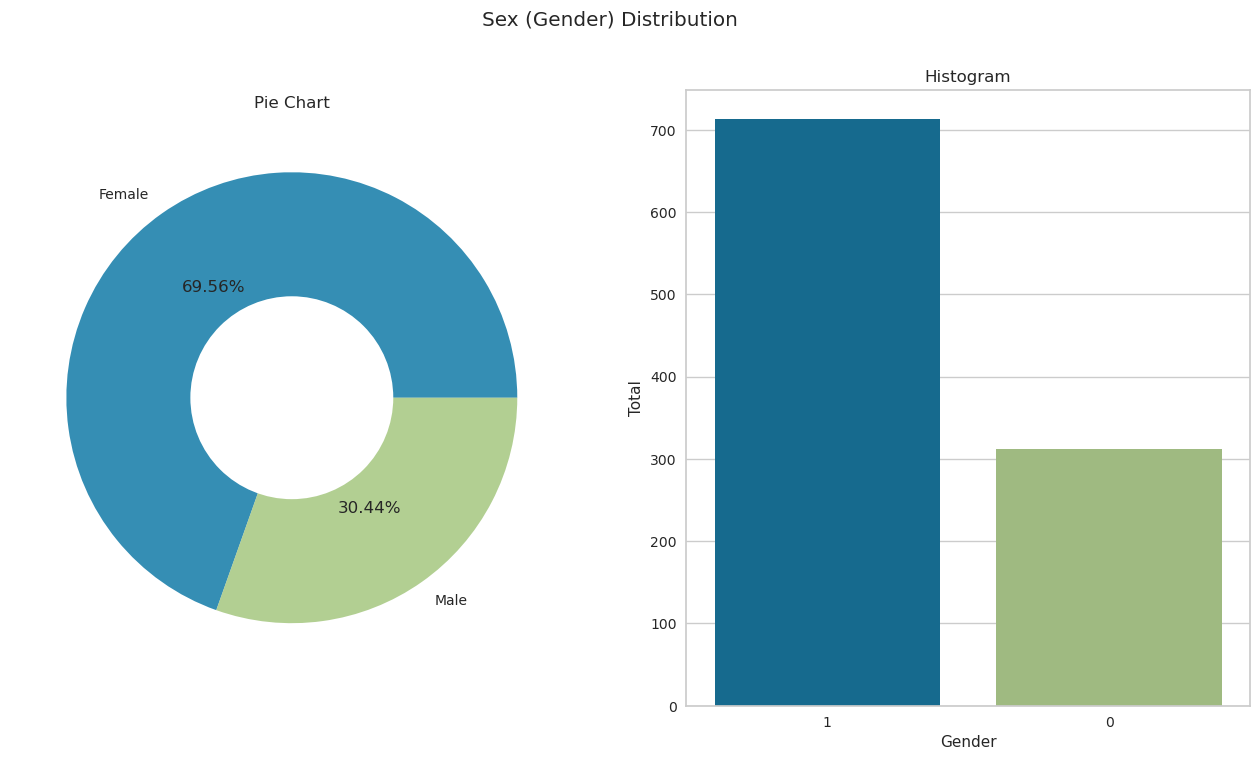

In [6]:
labels=['Female', 'Male']
order=df['sex'].value_counts().index

# Size for Both Figures
plt.figure(figsize= (16,8))
plt.suptitle('Sex (Gender) Distribution')

# Subplot 1 Pie Chart
plt.subplot(1,2,1)
plt.title('Pie Chart')
plt.pie(df['sex'].value_counts(),labels=labels, autopct='%.2f%%', wedgeprops=dict(alpha=0.8))
centre=plt.Circle((0, 0), 0.45, fc='white')
plt.gcf().gca().add_artist(centre)

#Subplot 2 Histogram
countplt = plt.subplot(1,2,2)
plt.title('Histogram')
ax= sns.countplot(x='sex',data=df,order=order)
plt.xlabel('Gender')
plt.ylabel('Total')
countplt

# Count Categorical Labels without dropping Null Values
print('\n Sex (Gender) Total \n')
df.sex.value_counts(dropna=False)
# print()

<div id='1'
     style = "display: fill;
              border-radius: 10px;
              background-color: #FE6244;">
    <h3 style = "padding: 15px; 
                 color: white;
                 text-align: left; 
                 font-family: Trebuchet MS;">cp (Chest Pain Type)
    </h3>
</div>


 Chest Pain Type Total 



1    713
0    312
Name: sex, dtype: int64

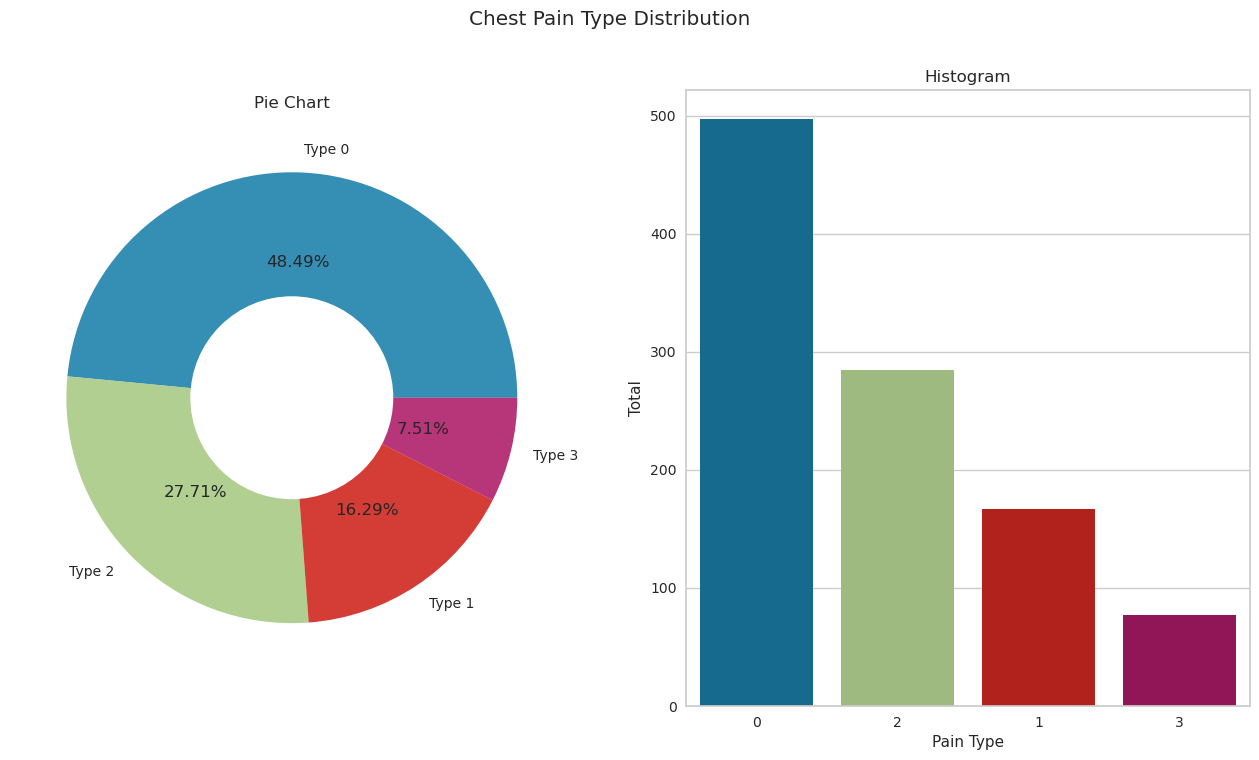

In [7]:
labels=['Type 0', 'Type 2', 'Type 1', 'Type 3']
order=df['cp'].value_counts().index

# Size for Both Figures
plt.figure(figsize= (16,8))
plt.suptitle('Chest Pain Type Distribution')

# Subplot 1 Pie Chart
plt.subplot(1,2,1)
plt.title('Pie Chart')
plt.pie(df['cp'].value_counts(),labels=labels, autopct='%.2f%%', wedgeprops=dict(alpha=0.8))
centre=plt.Circle((0, 0), 0.45, fc='white')
plt.gcf().gca().add_artist(centre)

#Subplot 2 Histogram
countplt = plt.subplot(1,2,2)
plt.title('Histogram')
ax= sns.countplot(x='cp',data=df,order=order)
plt.xlabel('Pain Type')
plt.ylabel('Total')
countplt

# Count Categorical Labels without dropping Null Values
print('\n Chest Pain Type Total \n')
df.sex.value_counts(dropna=False)
# print()

<div id='1'
     style = "display: fill;
              border-radius: 10px;
              background-color: #FE6244;">
    <h3 style = "padding: 15px; 
                 color: white;
                 text-align: left; 
                 font-family: Trebuchet MS;"> fbs (Fasting Blood Sugar)
    </h3>
</div>


 Fasting BLood Sugar Total 



1    713
0    312
Name: sex, dtype: int64

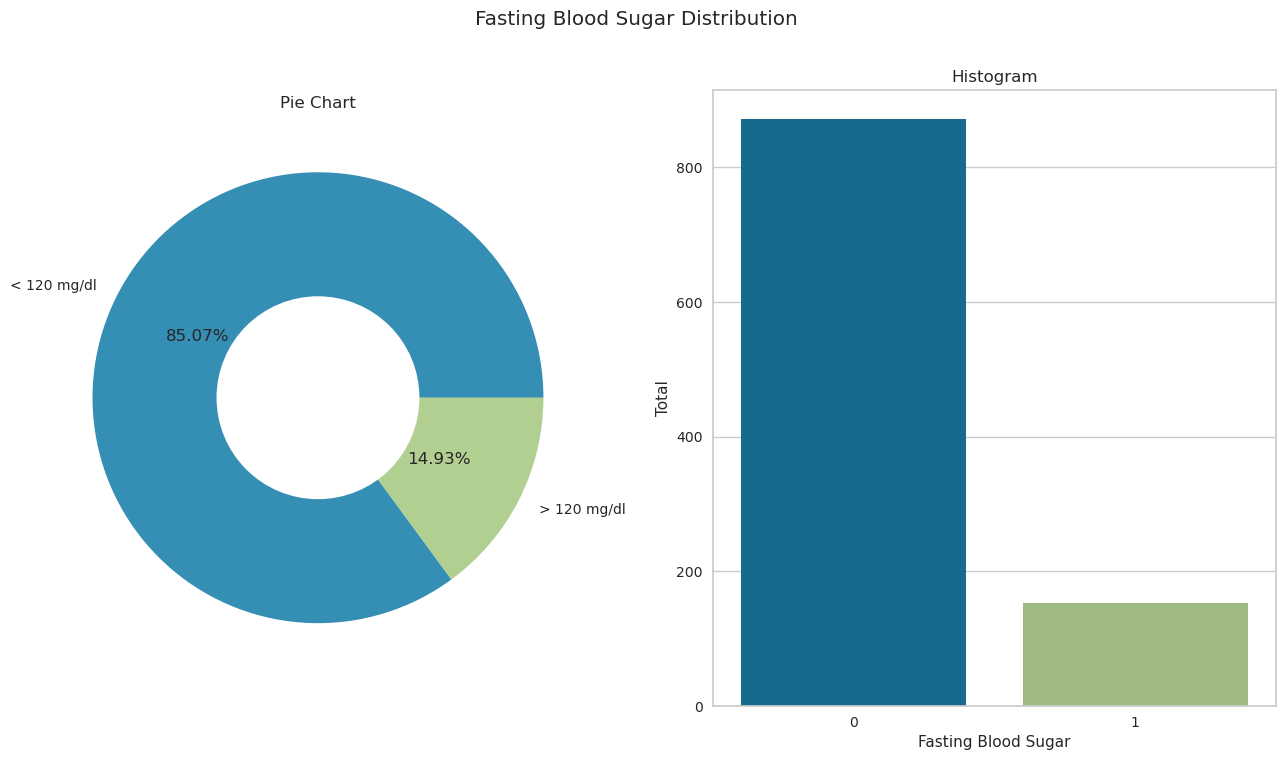

In [8]:
labels=['< 120 mg/dl', '> 120 mg/dl']
order=df['fbs'].value_counts().index

# Size for Both Figures
plt.figure(figsize= (16,8))
plt.suptitle('Fasting Blood Sugar Distribution')

# Subplot 1 Pie Chart
plt.subplot(1,2,1)
plt.title('Pie Chart')
plt.pie(df['fbs'].value_counts(),labels=labels, autopct='%.2f%%', wedgeprops=dict(alpha=0.8))
centre=plt.Circle((0, 0), 0.45, fc='white')
plt.gcf().gca().add_artist(centre)

#Subplot 2 Histogram
countplt = plt.subplot(1,2,2)
plt.title('Histogram')
ax= sns.countplot(x='fbs',data=df,order=order)
plt.xlabel('Fasting Blood Sugar')
plt.ylabel('Total')
countplt

# Count Categorical Labels without dropping Null Values
print('\n Fasting BLood Sugar Total \n')
df.sex.value_counts(dropna=False)
# print()

<div id='1'
     style = "display: fill;
              border-radius: 10px;
              background-color: #FE6244;">
    <h3 style = "padding: 15px; 
                 color: white;
                 text-align: left; 
                 font-family: Trebuchet MS;"> restecg (Resting Electrocardiographic Results)
    </h3>
</div>


 Resting Electrocardiographic Results Total 



1    713
0    312
Name: sex, dtype: int64

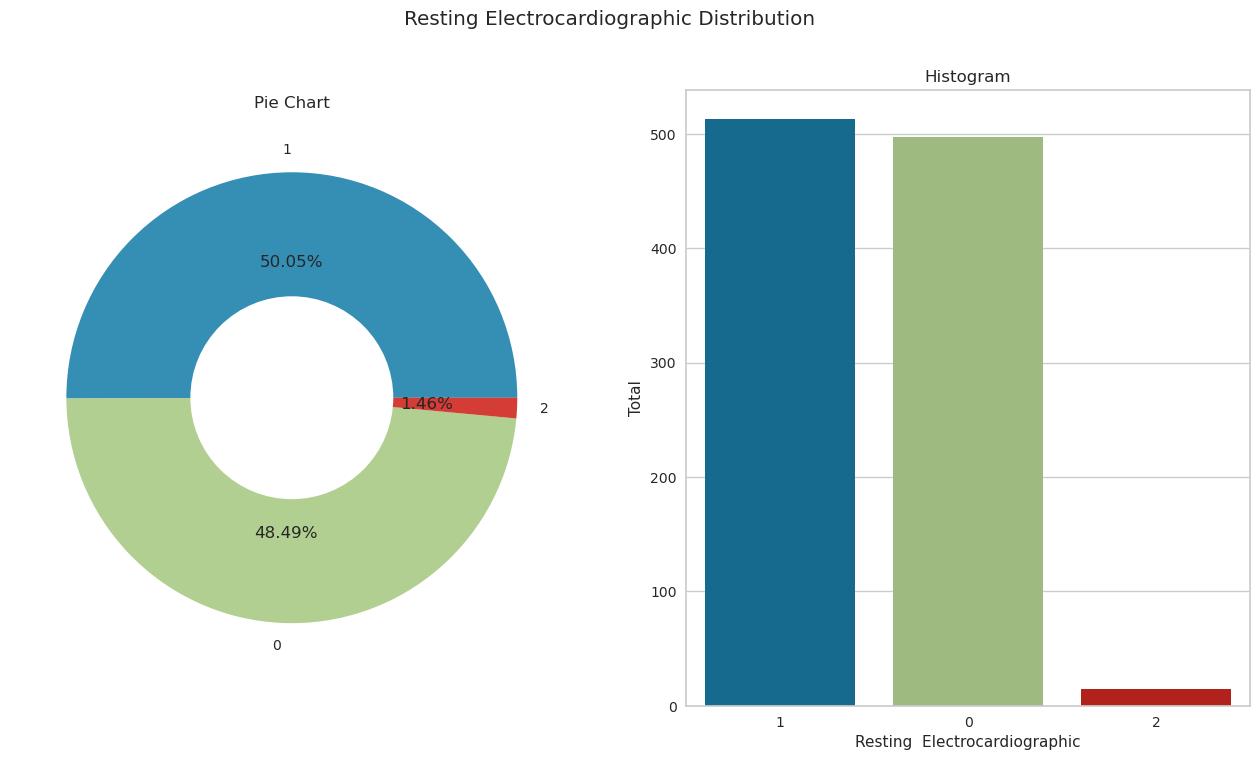

In [9]:
labels=['1', '0', '2']
order=df['restecg'].value_counts().index

# Size for Both Figures
plt.figure(figsize= (16,8))
plt.suptitle('Resting Electrocardiographic Distribution')

# Subplot 1 Pie Chart
plt.subplot(1,2,1)
plt.title('Pie Chart')
plt.pie(df['restecg'].value_counts(),labels=labels, autopct='%.2f%%', wedgeprops=dict(alpha=0.8))
centre=plt.Circle((0, 0), 0.45, fc='white')
plt.gcf().gca().add_artist(centre)

#Subplot 2 Histogram
countplt = plt.subplot(1,2,2)
plt.title('Histogram')
ax= sns.countplot(x='restecg',data=df,order=order)
plt.xlabel('Resting  Electrocardiographic')
plt.ylabel('Total')
countplt

# Count Categorical Labels without dropping Null Values
print('\n Resting Electrocardiographic Results Total \n')
df.sex.value_counts(dropna=False)
# print()

<div id='1'
     style = "display: fill;
              border-radius: 10px;
              background-color: #FE6244;">
    <h3 style = "padding: 15px; 
                 color: white;
                 text-align: left; 
                 font-family: Trebuchet MS;"> exang (Exercise Induced Angina)
    </h3>
</div>


 Exercise Induced Angina Total 



1    713
0    312
Name: sex, dtype: int64

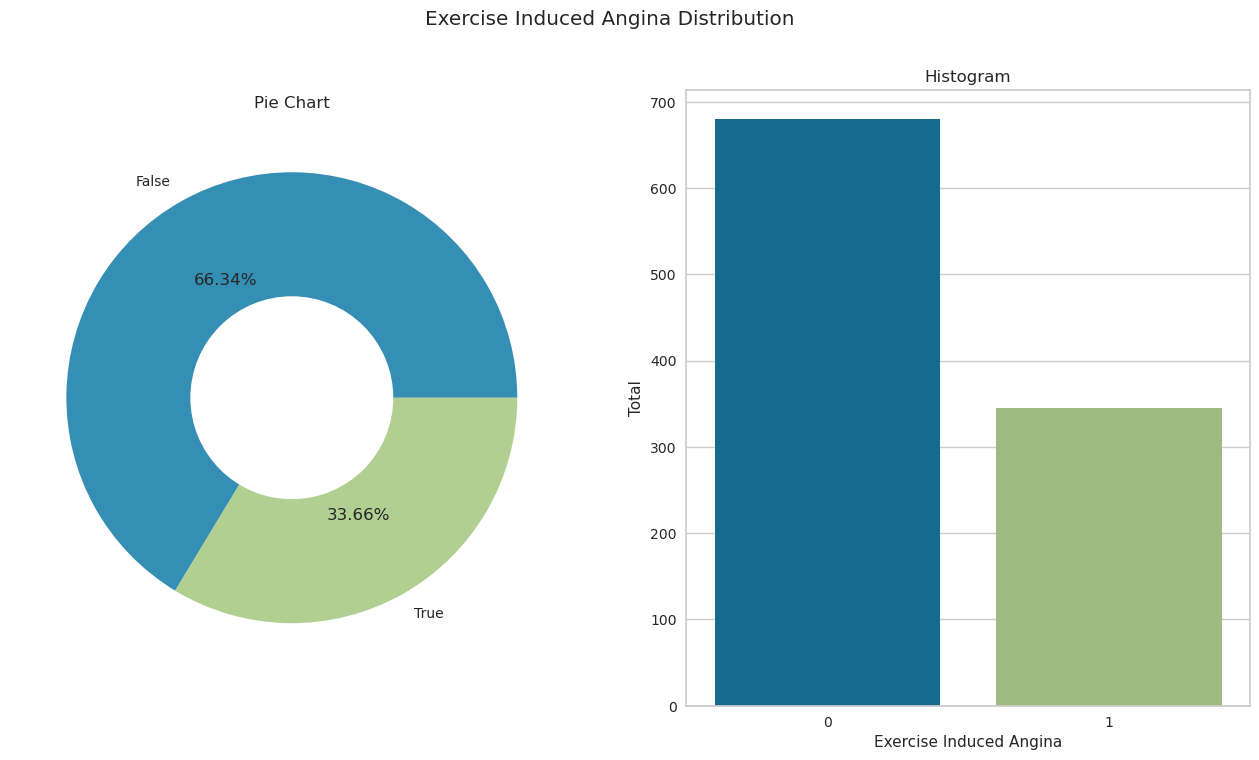

In [10]:
labels=['False', 'True']
order=df['exang'].value_counts().index

# Size for Both Figures
plt.figure(figsize= (16,8))
plt.suptitle('Exercise Induced Angina Distribution')

# Subplot 1 Pie Chart
plt.subplot(1,2,1)
plt.title('Pie Chart')
plt.pie(df['exang'].value_counts(),labels=labels, autopct='%.2f%%', wedgeprops=dict(alpha=0.8))
centre=plt.Circle((0, 0), 0.45, fc='white')
plt.gcf().gca().add_artist(centre)

#Subplot 2 Histogram
countplt = plt.subplot(1,2,2)
plt.title('Histogram')
ax= sns.countplot(x='exang',data=df,order=order)
plt.xlabel('Exercise Induced Angina')
plt.ylabel('Total')
countplt

# Count Categorical Labels without dropping Null Values
print('\n Exercise Induced Angina Total \n')
df.sex.value_counts(dropna=False)
# print()

<div id='1'
     style = "display: fill;
              border-radius: 10px;
              background-color: #FE6244;">
    <h3 style = "padding: 15px; 
                 color: white;
                 text-align: left; 
                 font-family: Trebuchet MS;"> slope (Slope of the Peak Exercise)
    </h3>
</div>


 Slope Total 



1    713
0    312
Name: sex, dtype: int64

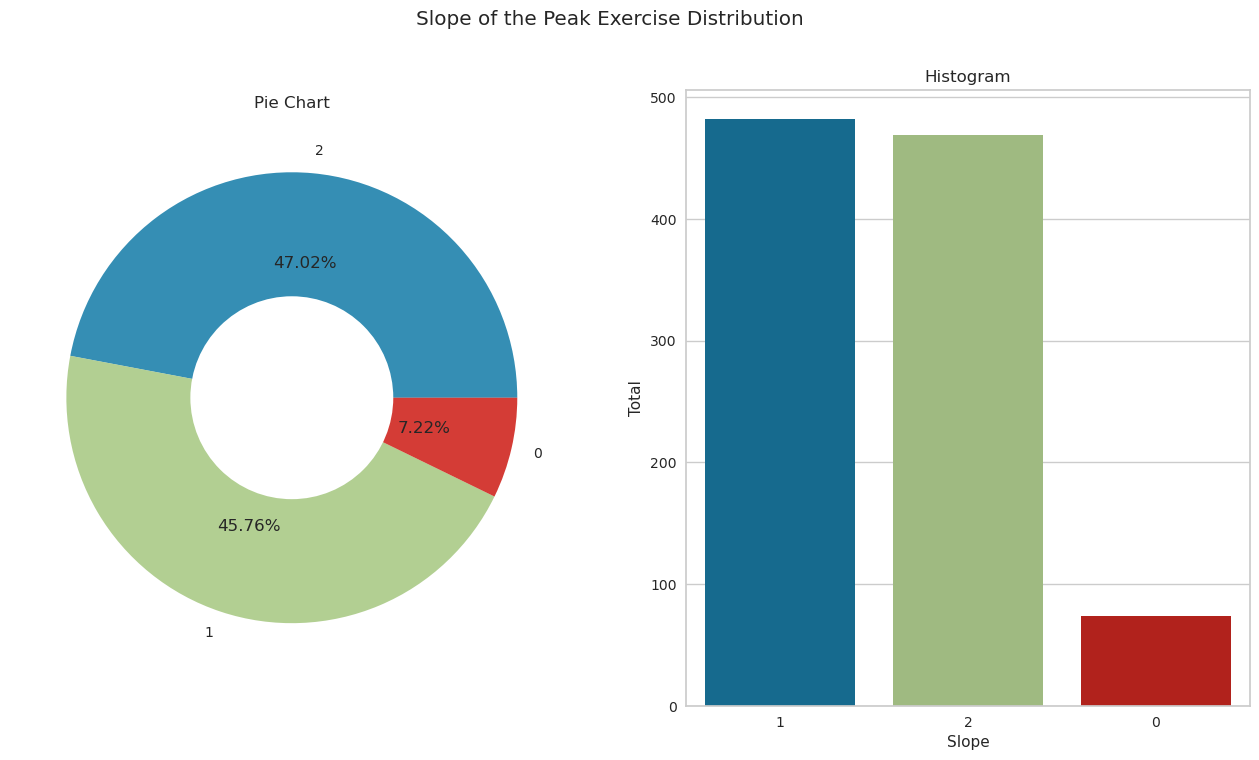

In [11]:
labels=['2', '1', '0']
order=df['slope'].value_counts().index

# Size for Both Figures
plt.figure(figsize= (16,8))
plt.suptitle('Slope of the Peak Exercise Distribution')

# Subplot 1 Pie Chart
plt.subplot(1,2,1)
plt.title('Pie Chart')
plt.pie(df['slope'].value_counts(),labels=labels, autopct='%.2f%%', wedgeprops=dict(alpha=0.8))
centre=plt.Circle((0, 0), 0.45, fc='white')
plt.gcf().gca().add_artist(centre)

#Subplot 2 Histogram
countplt = plt.subplot(1,2,2)
plt.title('Histogram')
ax= sns.countplot(x='slope',data=df,order=order)
plt.xlabel('Slope')
plt.ylabel('Total')
countplt

# Count Categorical Labels without dropping Null Values
print('\n Slope Total \n')
df.sex.value_counts(dropna=False)
# print()

<div id='1'
     style = "display: fill;
              border-radius: 10px;
              background-color: #FE6244;">
    <h3 style = "padding: 15px; 
                 color: white;
                 text-align: left; 
                 font-family: Trebuchet MS;"> ca (Number of Major Vessels)
    </h3>
</div>


 Number of Major Vessels Total  



1    713
0    312
Name: sex, dtype: int64

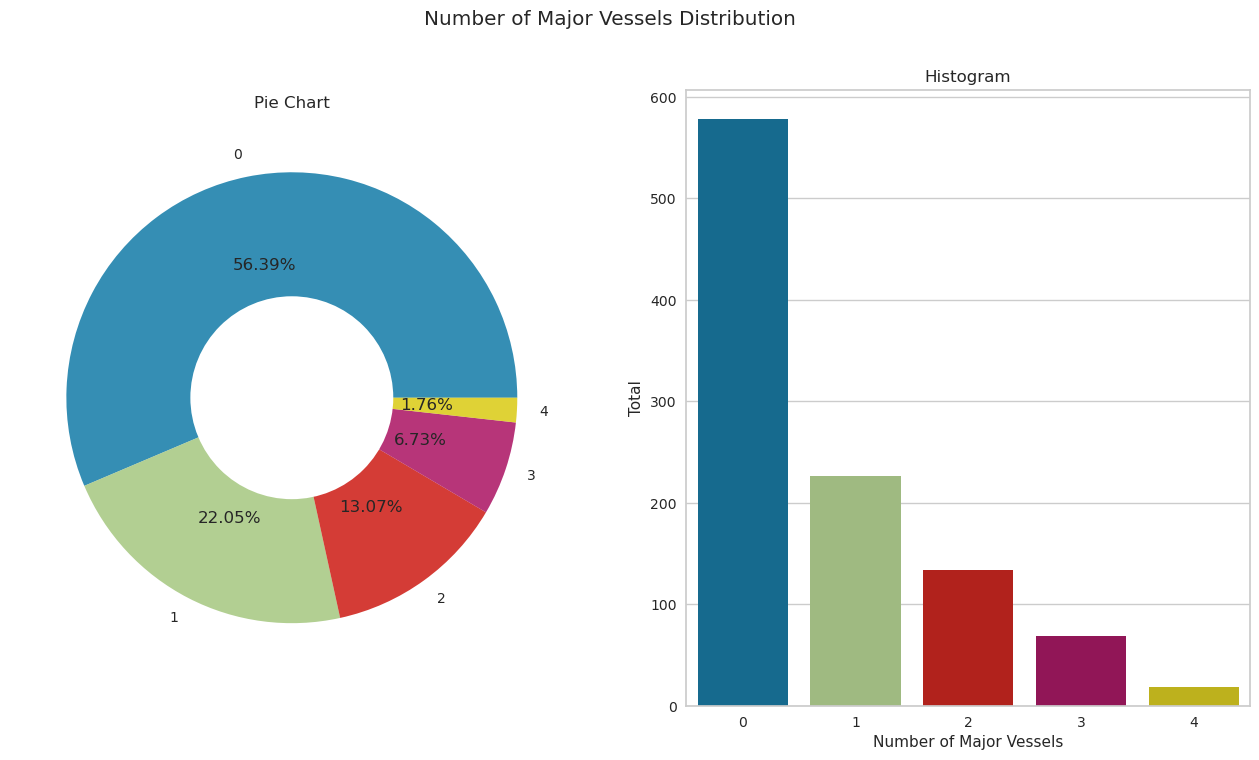

In [12]:
labels=['0', '1', '2', '3', '4']
order=df['ca'].value_counts().index

# Size for Both Figures
plt.figure(figsize= (16,8))
plt.suptitle('Number of Major Vessels Distribution')

# Subplot 1 Pie Chart
plt.subplot(1,2,1)
plt.title('Pie Chart')
plt.pie(df['ca'].value_counts(),labels=labels, autopct='%.2f%%', wedgeprops=dict(alpha=0.8))
centre=plt.Circle((0, 0), 0.45, fc='white')
plt.gcf().gca().add_artist(centre)

#Subplot 2 Histogram
countplt = plt.subplot(1,2,2)
plt.title('Histogram')
ax= sns.countplot(x='ca',data=df,order=order)
plt.xlabel('Number of Major Vessels')
plt.ylabel('Total')
countplt

# Count Categorical Labels without dropping Null Values
print('\n Number of Major Vessels Total  \n')
df.sex.value_counts(dropna=False)
# print()

<div id='1'
     style = "display: fill;
              border-radius: 10px;
              background-color: #FE6244;">
    <h3 style = "padding: 15px; 
                 color: white;
                 text-align: left; 
                 font-family: Trebuchet MS;"> thal
    </h3>
</div>


 "thal" Total  



1    713
0    312
Name: sex, dtype: int64

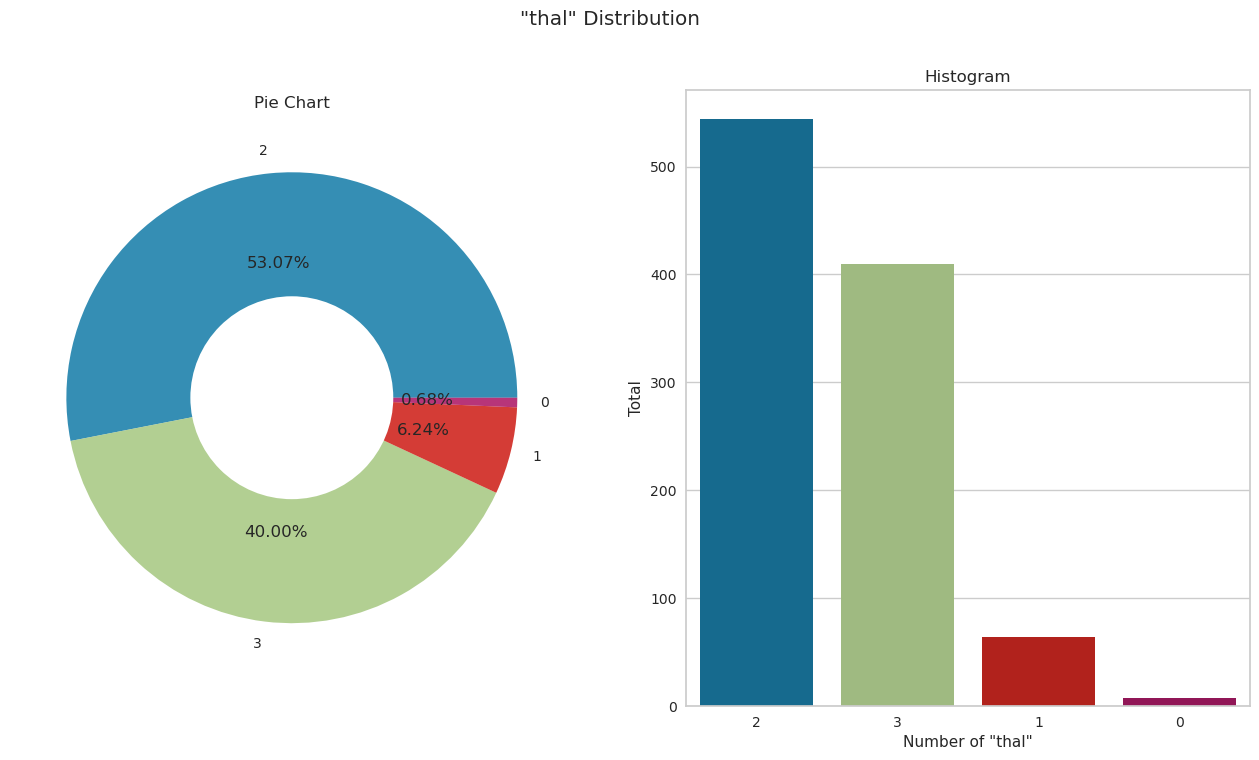

In [13]:
labels=['2', '3', '1', '0']
order=df['thal'].value_counts().index

# Size for Both Figures
plt.figure(figsize= (16,8))
plt.suptitle('"thal" Distribution')

# Subplot 1 Pie Chart
plt.subplot(1,2,1)
plt.title('Pie Chart')
plt.pie(df['thal'].value_counts(),labels=labels, autopct='%.2f%%', wedgeprops=dict(alpha=0.8))
centre=plt.Circle((0, 0), 0.45, fc='white')
plt.gcf().gca().add_artist(centre)

#Subplot 2 Histogram
countplt = plt.subplot(1,2,2)
plt.title('Histogram')
ax= sns.countplot(x='thal',data=df,order=order)
plt.xlabel('Number of "thal"')
plt.ylabel('Total')
countplt

# Count Categorical Labels without dropping Null Values
print('\n "thal" Total  \n')
df.sex.value_counts(dropna=False)
# print()

<div id='1'
     style = "display: fill;
              border-radius: 10px;
              background-color: #FE6244;">
    <h3 style = "padding: 15px; 
                 color: white;
                 text-align: left; 
                 font-family: Trebuchet MS;"> target (Heart Diseases Status)
    </h3>
</div>


 Heart Diseases Status (target) Total 



1    713
0    312
Name: sex, dtype: int64

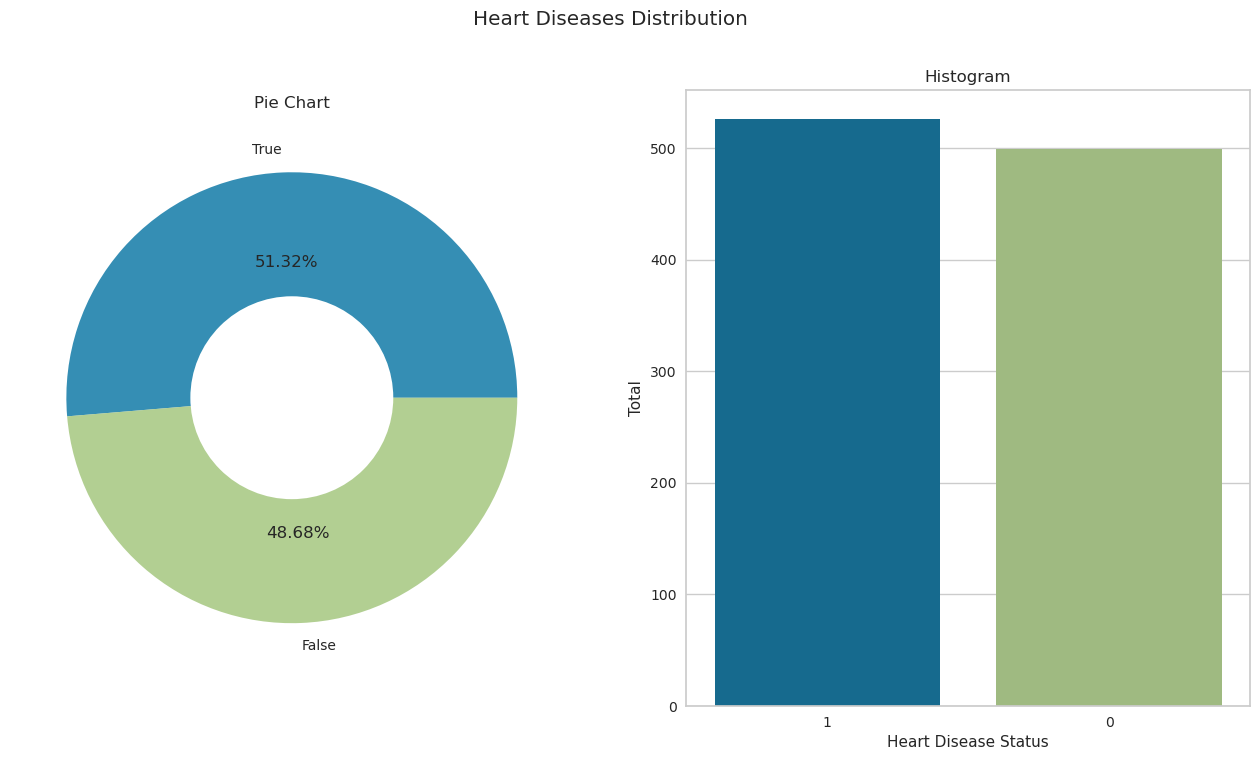

In [14]:
labels=['True', 'False']
order=df['target'].value_counts().index

# Size for Both Figures
plt.figure(figsize= (16,8))
plt.suptitle('Heart Diseases Distribution')

# Subplot 1 Pie Chart
plt.subplot(1,2,1)
plt.title('Pie Chart')
plt.pie(df['target'].value_counts(),labels=labels, autopct='%.2f%%', wedgeprops=dict(alpha=0.8))
centre=plt.Circle((0, 0), 0.45, fc='white')
plt.gcf().gca().add_artist(centre)

#Subplot 2 Histogram
countplt = plt.subplot(1,2,2)
plt.title('Histogram')
ax= sns.countplot(x='target',data=df,order=order)
plt.xlabel('Heart Disease Status')
plt.ylabel('Total')
countplt

# Count Categorical Labels without dropping Null Values
print('\n Heart Diseases Status (target) Total \n')
df.sex.value_counts(dropna=False)
# print()

<div id='HDG'
     style = "display: fill;
              border-radius: 10px;
              background-color: #FE6244;">
    <h3 style = "padding: 15px; 
                 color: white;
                 text-align: left; 
                 font-family: Trebuchet MS;"> Heart Disease Distribution Based on Gender
    </h3>
</div>

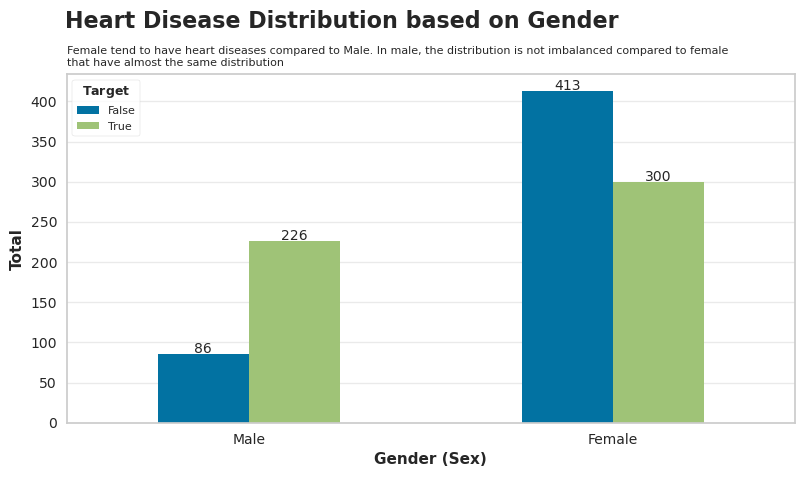

In [15]:
# --- Labels Settings ---
labels = ['False', 'True']
label_gender = np.array([0, 1])
label_gender2 = ['Male', 'Female']


# --- Creating Bar Chart ---
ax = pd.crosstab(df.sex, df.target).plot(kind='bar', figsize=(8, 5))


# --- Bar Chart Settings ---
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+1.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10)

plt.suptitle('Heart Disease Distribution based on Gender', fontweight='heavy', 
             x=0.065, y=0.98, ha='left', fontsize='16', fontfamily='sans-serif')
plt.title('Female tend to have heart diseases compared to Male. In male, the distribution is not imbalanced compared to female\nthat have almost the same distribution', 
          fontsize='8', fontfamily='sans-serif', loc='left')
plt.tight_layout(rect=[0, 0.04, 1, 1.025])
plt.xlabel('Gender (Sex)', fontfamily='sans-serif', fontweight='bold')
plt.ylabel('Total', fontfamily='sans-serif', fontweight='bold')
plt.xticks(label_gender, label_gender2, rotation=0)
plt.grid(axis='y', alpha=0.4)
plt.grid(axis='x', alpha=0)
plt.legend(labels=labels, title='$\\bf{Target}$', fontsize='8', 
           title_fontsize='9', loc='upper left', frameon=True);

<div id='HDV'
     style = "display: fill;
              border-radius: 10px;
              background-color: #FE6244;">
    <h3 style = "padding: 15px; 
                 color: white;
                 text-align: left; 
                 font-family: Trebuchet MS;"> Heart Disease Distribution Based on Major Vessels Total
    </h3>
</div>

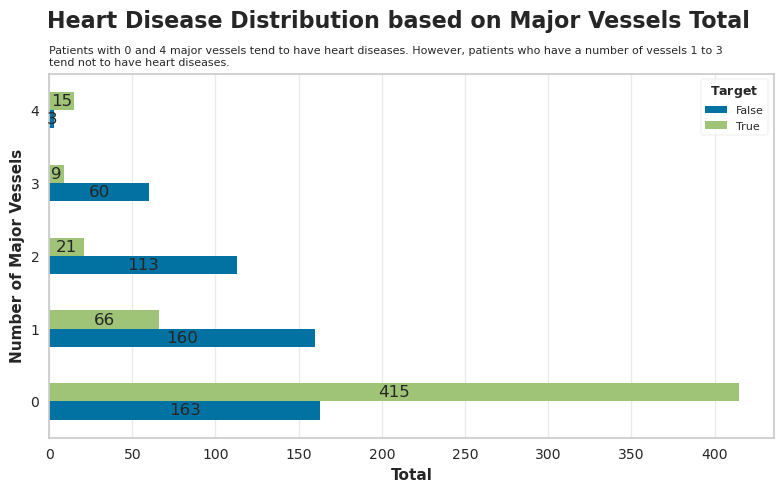

In [16]:
# --- Labels Settings ---
labels = ['False', 'True']

# --- Creating Horizontal Bar Chart ---
ax = pd.crosstab(df.ca, df.target).plot(kind='barh', figsize=(8, 5))

# --- Horizontal Bar Chart Settings ---
for rect in ax.patches:
    width, height = rect.get_width(), rect.get_height()
    x, y = rect.get_xy()
    ax.text (x+width/2, y+height/2, '{:.0f}'.format(width), 
             horizontalalignment='center', verticalalignment='center')

plt.suptitle('Heart Disease Distribution based on Major Vessels Total', 
             fontweight='heavy', x=0.069, y=0.98, ha='left', fontsize='16', 
             fontfamily='sans-serif')
plt.title('Patients with 0 and 4 major vessels tend to have heart diseases. However, patients who have a number of vessels 1 to 3\ntend not to have heart diseases.', 
          fontsize='8', fontfamily='sans-serif', loc='left')

plt.tight_layout(rect=[0, 0.04, 1, 1.025])
plt.xlabel('Total', fontfamily='sans-serif', fontweight='bold')
plt.ylabel('Number of Major Vessels', fontfamily='sans-serif', fontweight='bold')

plt.yticks(rotation=0)
plt.grid(axis='x', alpha=0.4)
plt.grid(axis='y', alpha=0)
plt.legend(labels=labels, title='$\\bf{Target}$', fontsize='8', frameon=True,
           title_fontsize='9', loc='upper right');

<div id='HDA'
     style = "display: fill;
              border-radius: 10px;
              background-color: #FE6244;">
    <h3 style = "padding: 15px; 
                 color: white;
                 text-align: left; 
                 font-family: Trebuchet MS;"> Heart Disease Scatter Plot Based on Age
    </h3>
</div>

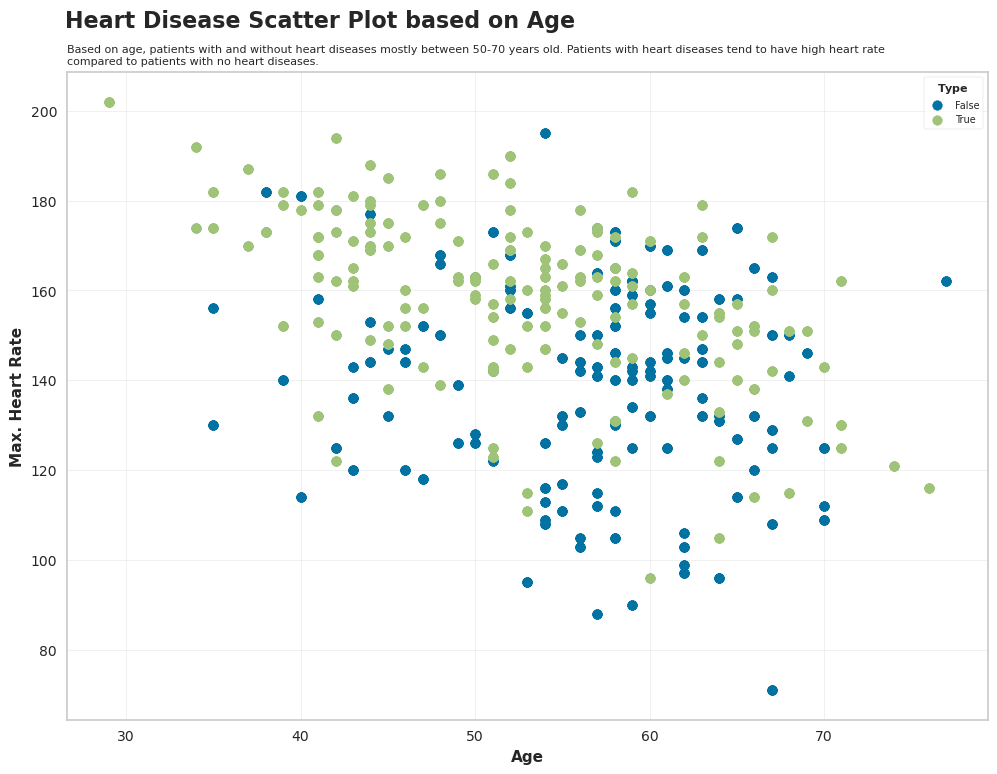

In [17]:
# -- Scatter Plot Size & Titles Settings ---
plt.figure(figsize=(10, 8))
plt.suptitle('Heart Disease Scatter Plot based on Age', fontweight='heavy', 
             x=0.048, y=0.98, ha='left', fontsize='16', fontfamily='sans-serif')

plt.title('Based on age, patients with and without heart diseases mostly between 50-70 years old. Patients with heart diseases tend to have high heart rate\ncompared to patients with no heart diseases.', 
          fontsize='8', fontfamily='sans-serif', loc='left')

plt.tight_layout(rect=[0, 0.04, 1, 1.01])

# --- Creating Scatter Plot ---
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)])
plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)])

# --- Scatter Plot Legend & Labels Settings ---
plt.legend(['False', 'True'], title='$\\bf{Type}$', fontsize='7', 
           title_fontsize='8', loc='upper right', frameon=True)

plt.xlabel('Age', fontweight='bold', fontsize='11',
           fontfamily='sans-serif')

plt.ylabel('Max. Heart Rate', fontweight='bold', fontsize='11', 
           fontfamily='sans-serif')

plt.ticklabel_format(style='plain', axis='both')
plt.grid(axis='both', alpha=0.4, lw=0.5)
plt.show();

<div id='HDS'
     style = "display: fill;
              border-radius: 10px;
              background-color: #FE6244;">
    <h3 style = "padding: 15px; 
                 color: white;
                 text-align: left; 
                 font-family: Trebuchet MS;"> Heart Disease Distribution Based on Fasting Blood Sugar
    </h3>
</div>

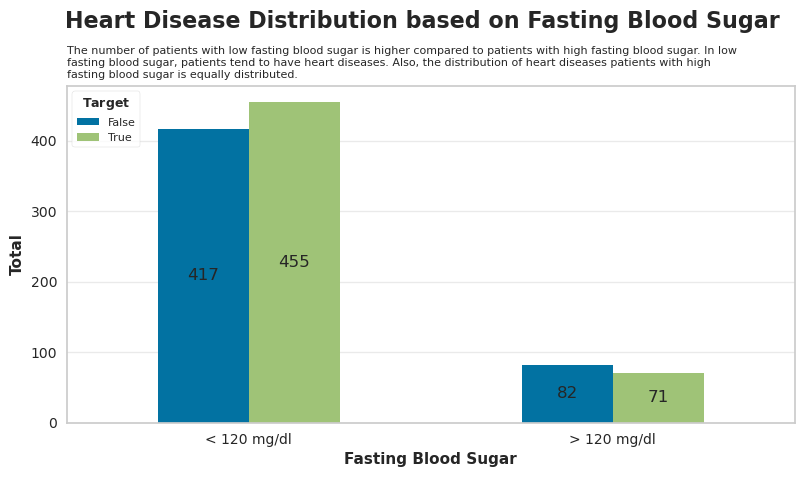

In [18]:
# --- Labels Settings ---
labels = ['False', 'True']
label_gender = np.array([0, 1])
label_gender2 = ['< 120 mg/dl', '> 120 mg/dl']

# --- Creating Bar Chart ---
ax = pd.crosstab(df.fbs, df.target).plot(kind='bar', figsize=(8, 5))

# --- Bar Chart Settings ---
for rect in ax.patches:
    width, height = rect.get_width(), rect.get_height()
    x, y = rect.get_xy()
    ax.text (x+width/2, y+height/2, '{:.0f}'.format(height), 
             horizontalalignment='center', verticalalignment='center')

plt.suptitle('Heart Disease Distribution based on Fasting Blood Sugar', 
             fontweight='heavy', x=0.065, y=0.98, ha='left', fontsize='16', 
             fontfamily='sans-serif')

plt.title('The number of patients with low fasting blood sugar is higher compared to patients with high fasting blood sugar. In low\nfasting blood sugar, patients tend to have heart diseases. Also, the distribution of heart diseases patients with high\nfasting blood sugar is equally distributed.', 
          fontsize='8', fontfamily='sans-serif', loc='left')

plt.tight_layout(rect=[0, 0.04, 1, 1.025])

plt.xlabel('Fasting Blood Sugar', fontfamily='sans-serif', fontweight='bold')

plt.ylabel('Total', fontfamily='sans-serif', fontweight='bold')

plt.xticks(label_gender, label_gender2, rotation=0)
plt.grid(axis='y', alpha=0.4)
plt.grid(axis='x', alpha=0)
plt.legend(labels=labels, title='$\\bf{Target}$', fontsize='8', 
           title_fontsize='9', loc='upper left', frameon=True);

<div id='heatmap'
     style = "display: fill;
              border-radius: 10px;
              background-color: #FE6244;">
    <h3 style = "padding: 15px; 
                 color: white;
                 text-align: left; 
                 font-family: Trebuchet MS;"> Heatmap
    </h3>
</div>

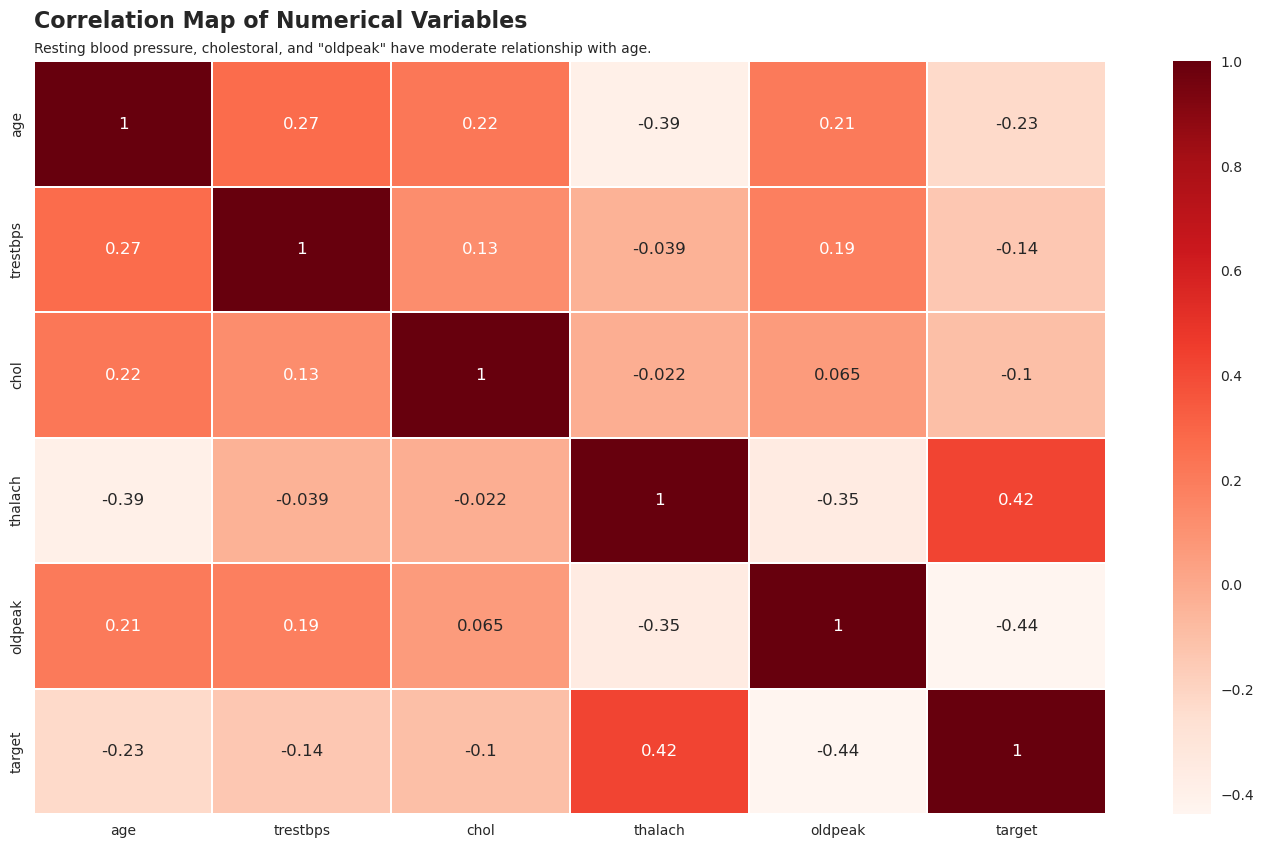

In [19]:
# --- Correlation Map (Heatmap) ---
plt.figure(figsize=(14, 9))

sns.heatmap(df.corr(), annot=True, cmap='Reds', linewidths=0.1)

plt.suptitle('Correlation Map of Numerical Variables', fontweight='heavy', 
             x=0.03, y=0.98, ha='left', fontsize='16', fontfamily='sans-serif')

plt.title('Resting blood pressure, cholestoral, and "oldpeak" have moderate relationship with age.', 
          fontsize='10', fontfamily='sans-serif', loc='left')
plt.tight_layout(rect=[0, 0.04, 1, 1.01])

<div id='3'
     style = "display: fill;
              border-radius: 10px;
              background-color: #19A7CE;">
    <h1 style = "padding: 20px; 
                 color: white;
                 text-align: left;
                 font-family: Trebuchet MS;"> 3. Data Preprocessing
    </h1>
</div>

<div id='OHE'
     style = "display: fill;
              border-radius: 10px;
              background-color: #FE6244;">
    <h3 style = "padding: 15px; 
                 color: white;
                 text-align: left;
                 font-family: Trebuchet MS;">One-Hot Encoding
    </h3>
</div>

In [20]:
# categorical columns
cp = pd.get_dummies(df['cp'],prefix= 'cp')
thal = pd.get_dummies(df['thal'],prefix = 'thal')
slope = pd.get_dummies(df['slope'],prefix = 'slope')

#merge dummy variables to main data frame
frames = [ df,cp,thal,slope]
df = pd.concat(frames,axis=1)

#Dropping the unnecessory variables
df=df.drop(columns = ['cp','thal','slope'])
df.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,52,1,125,212,0,1,168,0,1.0,2,...,0,0,0,0,0,0,1,0,0,1
1,53,1,140,203,1,0,155,1,3.1,0,...,0,0,0,0,0,0,1,1,0,0
2,70,1,145,174,0,1,125,1,2.6,0,...,0,0,0,0,0,0,1,1,0,0
3,61,1,148,203,0,1,161,0,0.0,1,...,0,0,0,0,0,0,1,0,0,1
4,62,0,138,294,1,1,106,0,1.9,3,...,0,0,0,0,0,1,0,0,1,0


In [21]:
#Missing values
df.isnull().sum()

age         0
sex         0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
ca          0
target      0
cp_0        0
cp_1        0
cp_2        0
cp_3        0
thal_0      0
thal_1      0
thal_2      0
thal_3      0
slope_0     0
slope_1     0
slope_2     0
dtype: int64

<div id='FS'
     style = "display: fill;
              border-radius: 10px;
              background-color: #FE6244;">
    <h3 style = "padding: 15px; 
                 color: white;
                 text-align: left;
                 font-family: Trebuchet MS;">Separating Target Variable
    </h3>
</div>

In [22]:
#Declaring Dependent and Independent variables
X = df.drop(['target'],axis=1)
y = df['target']

<div id='DN'
     style = "display: fill;
              border-radius: 10px;
              background-color: #FE6244;">
    <h3 style = "padding: 15px; 
                 color: white;
                 text-align: left;
                 font-family: Trebuchet MS;">Data Normalization
    </h3>
</div>

In [23]:
X = MinMaxScaler().fit_transform(X)

<div id='STTD'
     style = "display: fill;
              border-radius: 10px;
              background-color: #FE6244;">
    <h3 style = "padding: 15px; 
                 color: white;
                 text-align: left;
                 font-family: Trebuchet MS;"> Splitting Training and Testing Dataset
    </h3>
</div>

In [24]:
#Splitting x and y into training and testing datasets

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=4)

In [25]:
#checking the shape of X_train and X_test
X_train.shape, X_test.shape

((820, 21), (205, 21))

<div id='4'
     style = "display: fill;
              border-radius: 10px;
              background-color: #19A7CE;">
    <h1 style = "padding: 20px; 
                 color: white;
                 text-align: left;
                 font-family: Trebuchet MS;">4. Model Training
    </h1>
</div>

<div id='LR'
     style = "display: fill;
              border-radius: 10px;
              background-color: #FE6244;">
    <h3 style = "padding: 15px; 
                 color: white;
                 text-align: left;
                 font-family: Trebuchet MS;">1. Logistic Regression
    </h3>
</div>

In [26]:
LRmodel = LogisticRegression()

# Train Adaboost Classifer
LRmodel.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = LRmodel.predict(X_test)
LRA=accuracy_score(y_test, y_pred)
print("Logistic Regression Model Accuracy:", LRA)

Logistic Regression Model Accuracy: 0.848780487804878


<div id='KNN'
     style = "display: fill;
              border-radius: 10px;
              background-color: #FE6244;">
    <h3 style = "padding: 15px; 
                 color: white;
                 text-align: left;
                 font-family: Trebuchet MS;">2. K-Neartest Neighbours
    </h3>
</div>

In [27]:
KNNmodel = KNeighborsClassifier()

# Train K-Nearest Neighbor Classifer
KNNmodel.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = KNNmodel.predict(X_test)

KNNA=accuracy_score(y_test, y_pred)
print("K-Nearest Neighbors Model Accuracy:",KNNA)

K-Nearest Neighbors Model Accuracy: 0.8536585365853658


<div id='SVM'
     style = "display: fill;
              border-radius: 10px;
              background-color: #FE6244;">
    <h3 style = "padding: 15px; 
                 color: white;
                 text-align: left;
                 font-family: Trebuchet MS;"> 3. Support Vector Machine (SVM)
    </h3>
</div>

In [28]:
SVMmodel = SVC()

# Train Support Vector Machine(SVM)
SVMmodel.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = SVMmodel.predict(X_test)

SVMA= accuracy_score(y_test, y_pred)

print("Support Vector Machine Model Accuracy:", SVMA)

Support Vector Machine Model Accuracy: 0.8780487804878049


<div id='NB'
     style = "display: fill;
              border-radius: 10px;
              background-color: #FE6244;">
    <h3 style = "padding: 15px; 
                 color: white;
                 text-align: left;
                 font-family: Trebuchet MS;">4. Gaussian Naive Bayes
    </h3>
</div>

In [29]:
GNBmodel = GaussianNB()

# Train Gaussian Naive Bayes(SVM)
GNBmodel.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = GNBmodel.predict(X_test)

GNBA=accuracy_score(y_test, y_pred)
print("Gaussian Naive Bayes Model Accuracy:",GNBA )

Gaussian Naive Bayes Model Accuracy: 0.8146341463414634


<div id='DT'
     style = "display: fill;
              border-radius: 10px;
              background-color: #FE6244;">
    <h3 style = "padding: 15px; 
                 color: white;
                 text-align: left;
                 font-family: Trebuchet MS;">5. Decision Tree
    </h3>
</div>

In [30]:
DTmodel = DecisionTreeClassifier()

# Train Decision Tree(SVM)
DTmodel.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = DTmodel.predict(X_test)

DTA =accuracy_score(y_test, y_pred)
print("Decision Tree Model Accuracy:", DTA )

Decision Tree Model Accuracy: 1.0


In [31]:
feature_names=df.drop(['target'],axis=1).columns
class_names=['0','1']

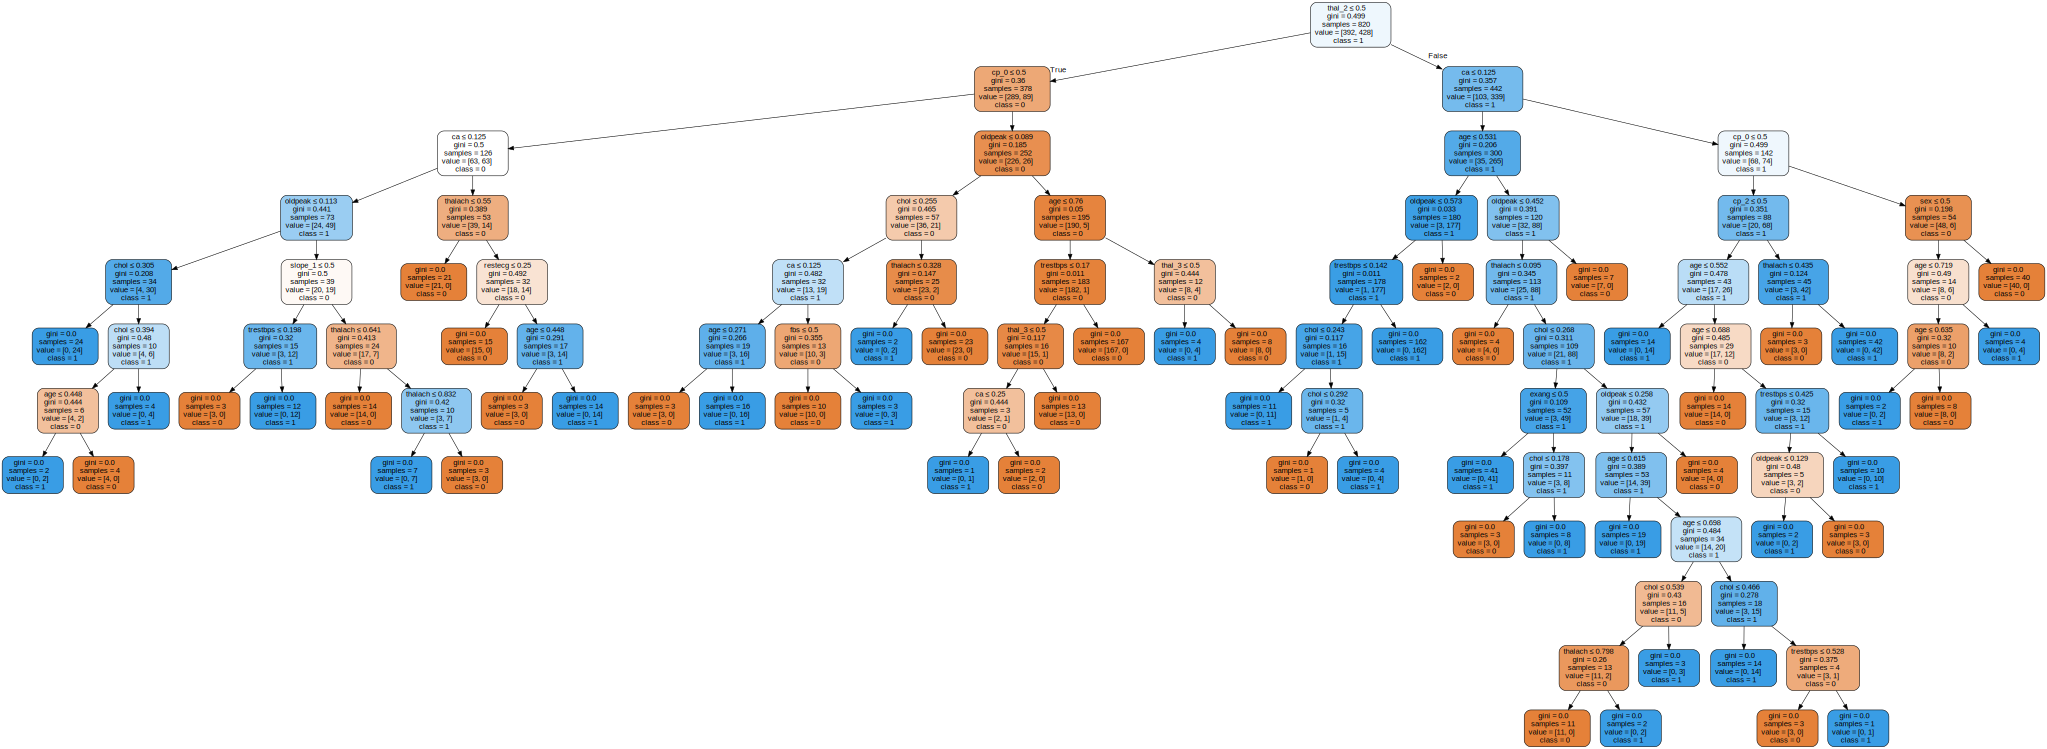

In [32]:
dot_data=tree.export_graphviz(DTmodel,out_file=None,
                             feature_names=feature_names,
                             class_names=class_names,
                             filled=True,rounded=True,special_characters=True)
graph=graphviz.Source(dot_data,format='png')
graph

<div id='RF'
     style = "display: fill;
              border-radius: 10px;
              background-color: #FE6244;">
    <h3 style = "padding: 15px; 
                 color: white;
                 text-align: left;
                 font-family: Trebuchet MS;">6. Random Forest
    </h3>
</div>

In [33]:
RFmodel = RandomForestClassifier()

# Random Forest
RFmodel.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = RFmodel.predict(X_test)
RFA = accuracy_score(y_test, y_pred)
print("Random Forest Accuracy:", RFA)

Random Forest Accuracy: 1.0


<div id='GB'
     style = "display: fill;
              border-radius: 10px;
              background-color: #FE6244;">
    <h3 style = "padding: 15px; 
                 color: white;
                 text-align: left;
                 font-family: Trebuchet MS;">7. Gradient Boosting
    </h3>
</div>

In [34]:
GBmodel = GradientBoostingClassifier()

# Train Gradient Boosting Classifer
GBmodel.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = GBmodel.predict(X_test)

GBA=accuracy_score(y_test, y_pred)
print("Gradient Boosting Classifier Model Accuracy:", GBA)

Gradient Boosting Classifier Model Accuracy: 0.9609756097560975


<div id='AB'
     style = "display: fill;
              border-radius: 10px;
              background-color: #FE6244;">
    <h3 style = "padding: 15px; 
                 color: white;
                 text-align: left;
                 font-family: Trebuchet MS;">8. AdaBoost
    </h3>
</div>

In [35]:
ABmodel = AdaBoostClassifier(n_estimators=3)

# Train Adaboost Classifer
ABmodel.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = ABmodel.predict(X_test)

ABA=accuracy_score(y_test, y_pred)
print("AdaBoost Classifier Model Accuracy:", ABA)

AdaBoost Classifier Model Accuracy: 0.848780487804878


<div id='ETC'
     style = "display: fill;
              border-radius: 10px;
              background-color: #FE6244;">
    <h3 style = "padding: 15px; 
                 color: white;
                 text-align: left;
                 font-family: Trebuchet MS;">9. Extra Tree Classifier
    </h3>
</div>

In [36]:
ETCmodel = ExtraTreesClassifier()

# Train Extra Tree Classifer
ETCmodel.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = ETCmodel.predict(X_test)

ETCA= accuracy_score(y_test, y_pred)
print("Extra Tree Classifier Model Accuracy:", ETCA)

Extra Tree Classifier Model Accuracy: 1.0


<div id='MC'
     style = "display: fill;
              border-radius: 10px;
              background-color: #FE6244;">
    <h3 style = "padding: 20px; 
                 color: white;
                 text-align: left;
                 font-family: Trebuchet MS;"> Model Comparison
    </h3>
</div>

In [37]:
compare = pd.DataFrame({'Model': ['Logistic Regression', 'K-Nearest Neighbour', 'Support Vector Machine', 
                                  'Gaussian Naive Bayes', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 
                                  'AdaBoost','Extra Tree Classifier'], 
                        'Accuracy': [LRA*100, KNNA*100, SVMA*100, GNBA*100, DTA*100, RFA*100, GBA*100, 
                                     ABA*100, ETCA*100]})

# --- Create Accuracy Comparison Table ---
compare.style.hide_index().set_properties(**{'font-family': 'Segoe UI'})

Model,Accuracy
Logistic Regression,84.878049
K-Nearest Neighbour,85.365854
Support Vector Machine,87.804878
Gaussian Naive Bayes,81.463415
Decision Tree,100.000000
Random Forest,100.000000
Gradient Boosting,96.097561
AdaBoost,84.878049
Extra Tree Classifier,100.000000


<div id='5'
     style = "display: fill;
              border-radius: 10px;
              background-color: #19A7CE;">
    <h1 style = "padding: 20px; 
                 color: white;
                 text-align: left;
                 font-family: Trebuchet MS;">5. Evaluation
    </h1>
</div>

<div id='ACC'
     style = "display: fill;
              border-radius: 10px;
              background-color: #FE6244;">
    <h3 style = "padding: 15px; 
                 color: white;
                 text-align: left;
                 font-family: Trebuchet MS;">Accuracy
    </h3>
</div>

In [38]:
y_pred = DTmodel.predict(X_test)
y_pred_train = DTmodel.predict(X_train)
from sklearn.metrics import accuracy_score
print("Model Test Accuracy : {0:0.4f}".format(accuracy_score(y_test,y_pred)))
print("Model Train Accuracy : {0:0.4f}".format(accuracy_score(y_train,y_pred_train)))

Model Test Accuracy : 1.0000
Model Train Accuracy : 1.0000


<div id='CM'
     style = "display: fill;
              border-radius: 10px;
              background-color: #FE6244;">
    <h3 style = "padding: 15px; 
                 color: white;
                 text-align: left;
                 font-family: Trebuchet MS;">Confusion Matrix
    </h3>
</div>

In [39]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print('Confusion Matrix\n\n',cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion Matrix

 [[107   0]
 [  0  98]]

True Positives(TP) =  107

True Negatives(TN) =  98

False Positives(FP) =  0

False Negatives(FN) =  0


<AxesSubplot:>

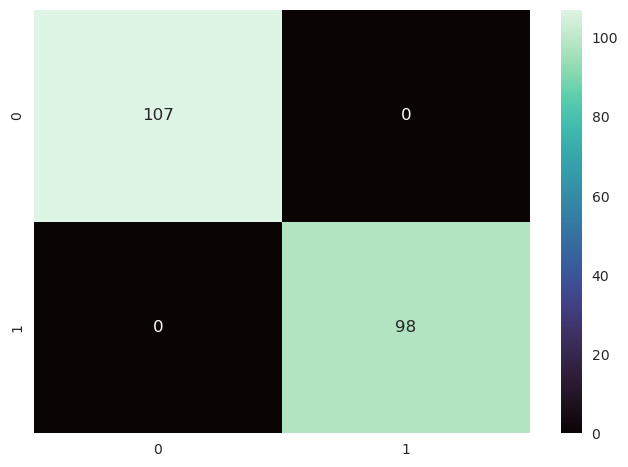

In [40]:
sns.heatmap(cm,annot= True, fmt='d', cmap='mako')

<div id='CR'
     style = "display: fill;
              border-radius: 10px;
              background-color: #FE6244;">
    <h3 style = "padding: 15px; 
                 color: white;
                 text-align: left;
                 font-family: Trebuchet MS;"> Classification Report
    </h3>
</div>

In [41]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       107
           1       1.00      1.00      1.00        98

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



<div id='SCM'
     style = "display: fill;
              border-radius: 10px;
              background-color: #FE6244;">
    <h3 style = "padding: 15px; 
                 color: white;
                 text-align: left;
                 font-family: Trebuchet MS;"> Scores from Confusion Matrix
    </h3>
</div>

In [42]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

# print classification accuracy
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

# print classification error
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

# print precision score
precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))

#print recall score
recall = TP / float(TP + FN)
print('Recall or Sensitivity : {0:0.4f}'.format(recall))

#true positive rate
true_positive_rate = TP / float(TP + FN)
print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))


#false positive rate
false_positive_rate = FP / float(FP + TN)
print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

#Specificity
specificity = TN / (TN + FP)
print('Specificity : {0:0.4f}'.format(specificity))

Classification accuracy : 1.0000
Classification error : 0.0000
Precision : 1.0000
Recall or Sensitivity : 1.0000
True Positive Rate : 1.0000
False Positive Rate : 0.0000
Specificity : 1.0000


<div id='ROC'
     style = "display: fill;
              border-radius: 10px;
              background-color: #FE6244;">
    <h3 style = "padding: 15px; 
                 color: white;
                 text-align: left;
                 font-family: Trebuchet MS;">ROC Curve
    </h3>
</div>

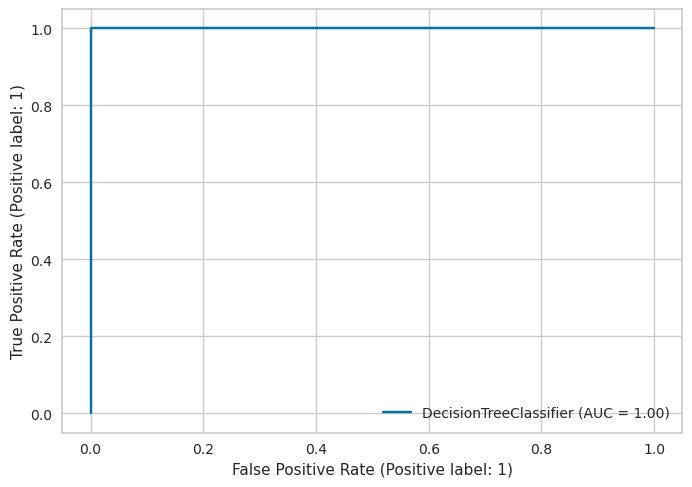

In [43]:
from sklearn import metrics
metrics.plot_roc_curve(DTmodel,X_test,y_test)
plt.show()


<div id='AUC'
     style = "display: fill;
              border-radius: 10px;
              background-color: #FE6244;">
    <h3 style = "padding: 15px; 
                 color: white;
                 text-align: left;
                 font-family: Trebuchet MS;">ROC AUC Score
    </h3>
</div>

In [44]:
# compute ROC AUC
# store the predicted probabilities for class 1 - Probability of >50K

y_pred1 = DTmodel.predict_proba(X_test)[:, 1]
from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred1)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 1.0000


<div id='LC'
     style = "display: fill;
              border-radius: 10px;
              background-color: #FE6244;">
    <h3 style = "padding: 15px; 
                 color: white;
                 text-align: left;
                 font-family: Trebuchet MS;">Learning Curve
    </h3>
</div>

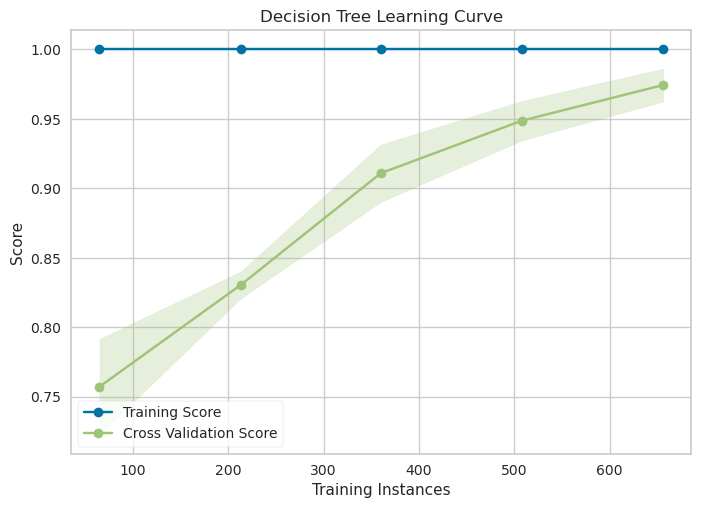

<AxesSubplot:title={'center':'Decision Tree Learning Curve'}, xlabel='Training Instances', ylabel='Score'>

In [45]:
dtclc = LearningCurve(DTmodel, title='Decision Tree Learning Curve')
dtclc.fit(X_train, y_train)
dtclc.show()

<div id='6'
     style = "display: fill;
              border-radius: 10px;
              background-color: #0E8388;">
    <h1 style = "padding: 30px; 
                 color: white;
                 font-weight:600;
                 font-size:50px;
                 text-align: CENTER;
                 font-family: Tilt Warp;">PLEASE UPVOTE IF IT HELPED
    </h1>
</div>